### Load Iris dataset from sklearn

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2,3]] ## petal length , petal width
y = iris.target

print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)

In [9]:
print('Labels counts in y :', np.bincount(y))
print('Labels in y_train :', np.bincount(y_train))
print('Labels in y_test :', np.bincount(y_test))

Labels counts in y : [50 50 50]
Labels in y_train : [35 35 35]
Labels in y_test : [15 15 15]


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
X_combined_std = np.vstack( (X_train_std, X_test_std) )
y_combined = np.hstack((y_train, y_test))

In [34]:
## plot decision boundary

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        # plt.scatter(X_test[:, 0], X_test[:, 1],
        #             c='black', edgecolor='black', alpha=1.0,
        #             linewidth=1, marker='o',
        #             s=100, label='test set')

        plt.scatter(X_test[:, 0], X_test[:, 1],
            facecolors='none', edgecolor='black', alpha=1.0,
            linewidth=1, marker='o',
            s=100, label='test set')

## Modeling class probabilities via logistic regression

### Logistic regression and conditional probabilities

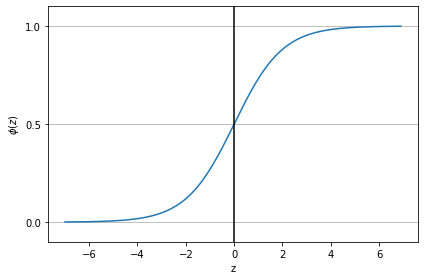

In [2]:
## Plot sigmoid

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def sigmoid(z):
    return 1 / (1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0,0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

## y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0]) ## get current Axes
ax = plt.gca()
ax.yaxis.grid(True) 
plt.tight_layout()
plt.show()

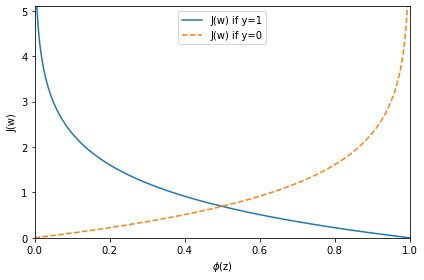

In [4]:
## p.66 : plot phi(z) vs J

def cost_1(z): ## cost for label '1'
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1-sigmoid(z))


z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]

plt.plot(phi_z, c1, linestyle='-', label='J(w) if y=1')
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Converting an Adaline implementation into an algorithm for logistic regression

In [21]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            ## note that we compute the logistic 'cost' now
            ## instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        ## or return np.where(self.activation(self.net_input(X) >= 0.5, 1, 0))

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4173905832.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


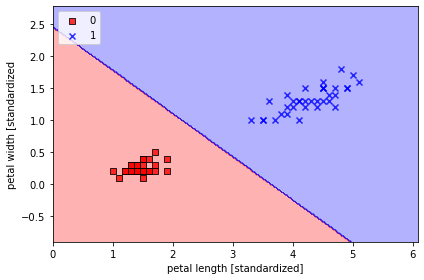

In [22]:
## check logistic regression

## filter class '0', '1'
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y = y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Training a logistic regression model with scikit-learn

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


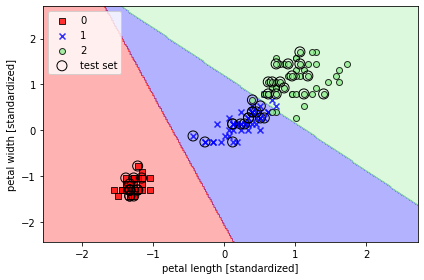

In [35]:
## P.72
## multi_class = 'ovr' , 'multinomial'
## multinomial , recommended in practice , mutually exclusive class <-> multilabel classification

## set multi_class = 'ovr'

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1,
                         solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


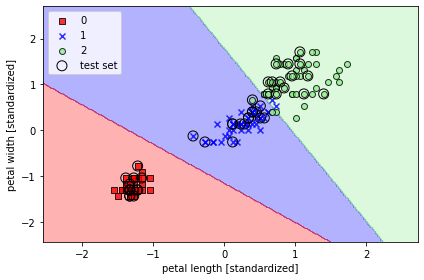

In [36]:
## set multi_class = 'multinomial'

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1,
                         solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
## predict probability
print(lr.predict_proba(X_test[:3,:]))

## find max idx
print(lr.predict_proba(X_test[:3,:]).argmax(axis=1))

## same result
print(lr.predict(X_test[:3,:]))

[[6.49027499e-48 8.37268662e-28 1.00000000e+00]
 [7.93507963e-13 2.54898263e-05 9.99974510e-01]
 [2.96804903e-10 1.23563792e-03 9.98764362e-01]]
[2 2 2]
[2 2 2]


In [45]:
## single data prediction and shape

print(X_test_std[0,:].shape)
# print(lr.predict(X_test[0,:])) # error
print(X_test[0,:].reshape(1,-1).shape)
print(lr.predict(X_test[0,:].reshape(1,-1)).shape)

(2,)
(1, 2)
(1,)


### Tackling overfitting via regularization

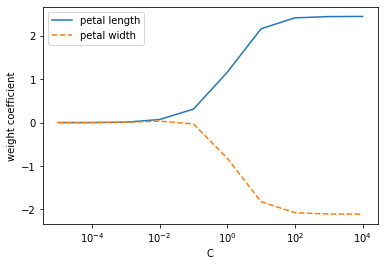

In [46]:
## J(w) , inverse regularization strengh 'C' , inverse of lambda term
## small C -> large regularization -> small weights

weights, params = [] , []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs', multi_class='ovr')

    lr.fit(X_train_std,y_train)

    ## weights of class 1 , multi_class = 'ovr'
    ## logistic regression has each model for each class                           
    weights.append(lr.coef_[1]) 
    params.append(10.0**c)

weights = np.array(weights) # weights.shape = (10,2)

plt.plot(params, weights[:,0],label='petal length')
plt.plot(params,weights[:,1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## SVM : Support Vector Machine Classification

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


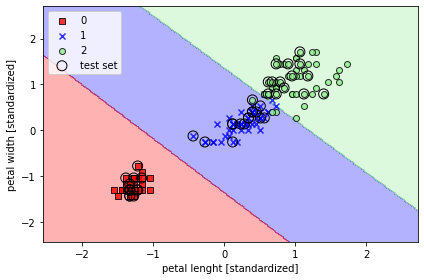

In [49]:
## hard margin -> large C

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std,y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))

plt.xlabel('petal lenght [standardized]')                      
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


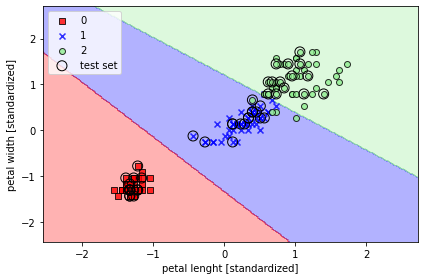

In [92]:
## C 1.0 -> 0.1

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.1, random_state=1)
svm.fit(X_train_std,y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))

plt.xlabel('petal lenght [standardized]')                      
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
## for large dataset, use SGD class

from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### Solving nonlinear problems using a kernel  SVM

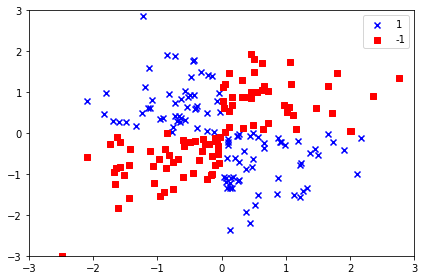

In [93]:
## Kernel method for linearly inseparable data

import matplotlib.pyplot as plt
import numpy as np

X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor,1,-1)

plt.scatter(X_xor[y_xor==1,0],
            X_xor[y_xor==1,1],
            c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],
            X_xor[y_xor==-1,1],
            c='r',marker='s',label='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [98]:
np.bincount(np.where(y_xor >0, True, False))

array([ 95, 105], dtype=int64)

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


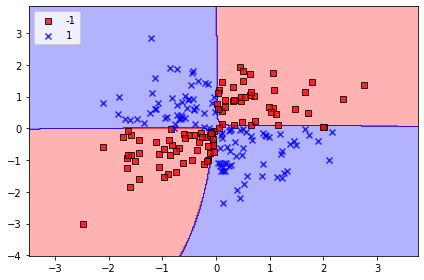

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


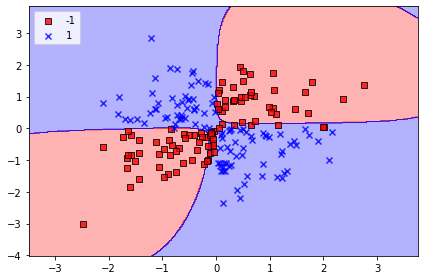

In [99]:
## Using the kernel trick to find separating hyperplanes in a high-demensional space

## RBF(Radial Basis Function) , 
## gamma = 1/(2*sigma**2) : cuf-off param for gaussian sphere
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## change gamma , C
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


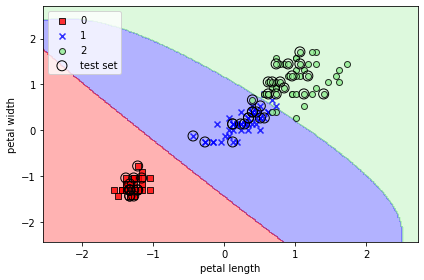

In [65]:
## kernel trick to Iris dataset

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std ,y_combined,
                      classifier=svm,
                      test_idx=range(105,150))

plt.xlabel('petal length')                      
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


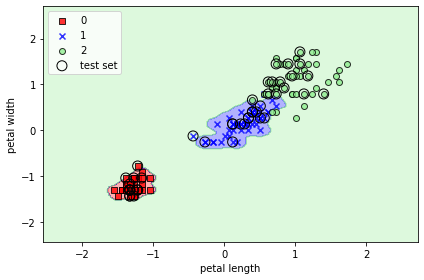

In [66]:
## increase gamma 0.2 -> 100.0

svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std ,y_combined,
                      classifier=svm,
                      test_idx=range(105,150))

plt.xlabel('petal length')                      
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Decision Tree

Text(0, 0.5, 'impurity index')

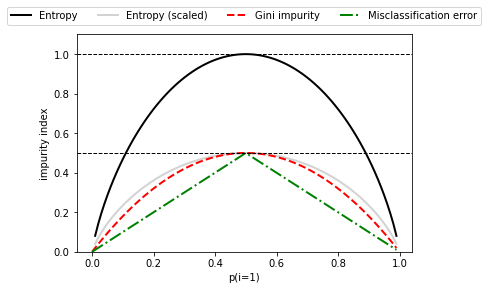

In [73]:
## Plot Entory, Gini Impurity, Misclassification Error vs probability
## binary class case
## class 0 probalitiy : p
## class 1 probability : q = 1 - p

import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    q = 1 - p
    return p * (1 - p) + q * (1 - q)

def entropy(p):
    return -p * np.log2(p) - (1-p) * np.log2(1-p)

def error(p):
    return 1 - np.max([p,1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [ entropy(p) if p != 0 else None for p in x ]
sc_ent = [ e*0.5 if e else None for e in ent ]
err = [ error(i) for i in x ]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                           ['Entropy', 'Entropy (scaled)', 'Gini impurity', 'Misclassification error'],
                           ['-','-','--','-.'],
                           ['black','lightgray','red','green','cyan']
                          ):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=5, fancybox=True, shadow=False)
# ax.legend(loc='upper center')
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')

### Building a decision tree

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


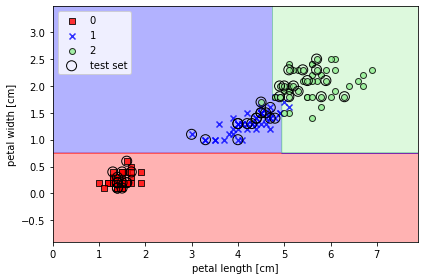

In [74]:
## max depth 4 , gini impurity

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1
                                    )

## Note : it's OK with non-scaled data
tree_model.fit(X_train, y_train)                                  
X_combined = np.vstack((X_train,X_test)) # Non-scaled
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree_model,
                      test_idx=range(105,150)  
                      )
plt.xlabel('petal length [cm]')                      
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

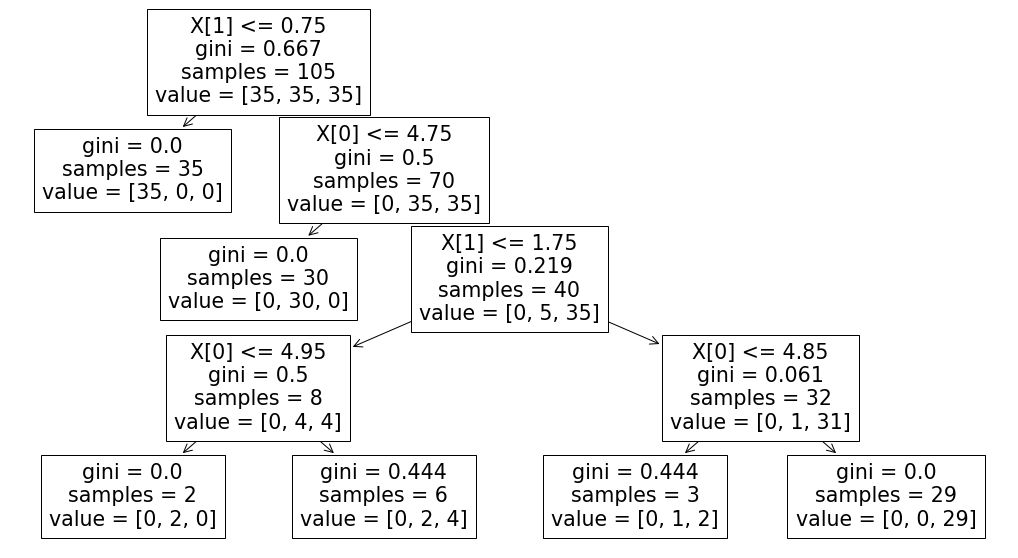

In [78]:
## visualize tree model

from sklearn import tree


fig = plt.figure(figsize=(18,10))
tree.plot_tree(tree_model)
plt.show()

In [82]:
## use graphviz , pydotplus

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model, filled=True, rounded=True,
                           class_names = ['Setosa','Versicolor','Virginica'],
                           feature_names = ['petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('./images/tree.png')                         

True

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


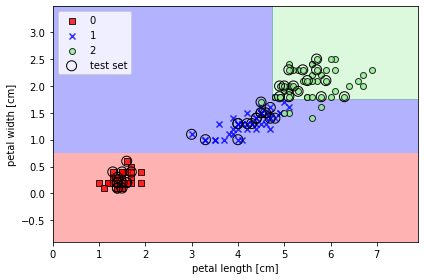

In [85]:
## max depth 4 -> 3

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=3,
                                    random_state=1
                                    )

## Note : it's OK with non-scaled data
tree_model.fit(X_train, y_train)                                  
X_combined = np.vstack((X_train,X_test)) # Non-scaled
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree_model,
                      test_idx=range(105,150)  
                      )
plt.xlabel('petal length [cm]')                      
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

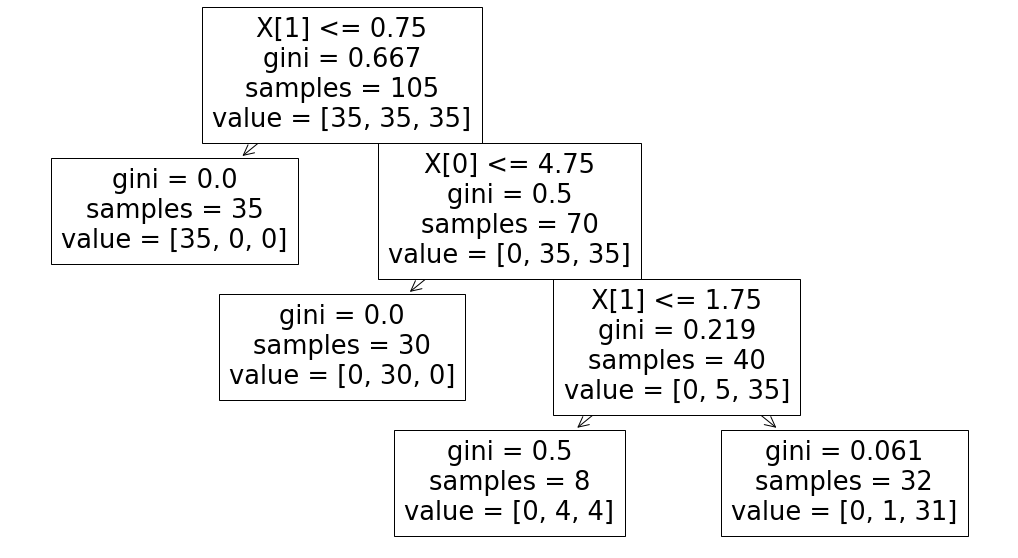

In [86]:
## visualize tree model

from sklearn import tree


fig = plt.figure(figsize=(18,10))
tree.plot_tree(tree_model)
plt.show()

## Random Forest

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


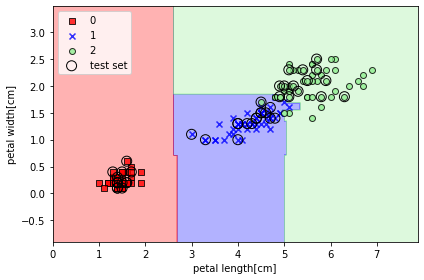

In [87]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)

forest.fit(X_train, y_train) ## no scaling
plot_decision_regions(X_combined, y_combined,
                       classifier=forest,
                       test_idx=range(105,150))
plt.xlabel('petal length[cm]')                       
plt.ylabel('petal width[cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## K-nearest neighbors - a lazy learning algorithm

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\4054067882.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


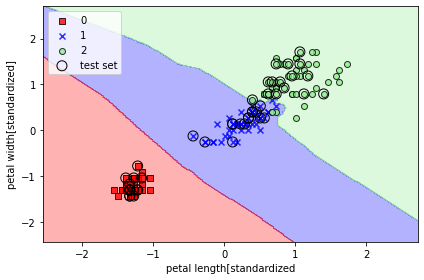

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                       classifier=knn,
                       test_idx=range(105,150))

plt.xlabel('petal length[standardized')                       
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()